In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import requests
import json
import sqlite3
import lxml

Create flat file data source

In [2]:
#load file
df=pd.read_csv("homigunstats.csv")

df.head(5)

,Country,2016,2015,2014,2013,2012,2011,2010
0,Mexico,12.5,10.3,9.7,11.9,13.8,15.5,15.5
1,Argentina,NaN,3.7,NaN,NaN,NaN,NaN,NaN
2,Armenia,0.5,0.9,0.3,0.4,0.2,0.2,0.3
3,Sweden,0.3,0.3,0.3,0.2,0.2,0.2,0.2
4,Sri Lanka,0.3,0.2,0.3,0.2,0.3,0.4,0.4


In [7]:
df2 = df[["2016","2015", "2014", "2013", "2012", "2011", "2010"]]

df2.head(5)

,2016,2015,2014,2013,2012,2011,2010
0,12.5,10.3,9.7,11.9,13.8,15.5,15.5
1,NaN,3.7,NaN,NaN,NaN,NaN,NaN
2,0.5,0.9,0.3,0.4,0.2,0.2,0.3
3,0.3,0.3,0.3,0.2,0.2,0.2,0.2
4,0.3,0.2,0.3,0.2,0.3,0.4,0.4


In [8]:
df['avg']= df2.mean(skipna=True, axis=1)
         
df.head(5)

,Country,2016,2015,2014,2013,2012,2011,2010,avg
0,Mexico,12.5,10.3,9.7,11.9,13.8,15.5,15.5,12.742857
1,Argentina,NaN,3.7,NaN,NaN,NaN,NaN,NaN,3.700000
2,Armenia,0.5,0.9,0.3,0.4,0.2,0.2,0.3,0.400000
3,Sweden,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.242857
4,Sri Lanka,0.3,0.2,0.3,0.2,0.3,0.4,0.4,0.300000


In [9]:
df3 = df[["Country","avg"]]   
df3.head(5)

,Country,avg
0,Mexico,12.742857
1,Argentina,3.700000
2,Armenia,0.400000
3,Sweden,0.242857
4,Sri Lanka,0.300000


In [12]:
df3 = df3[df3["avg"] > 0]


,Country,avg
0,Mexico,12.742857
1,Argentina,3.700000
2,Armenia,0.400000
3,Sweden,0.242857
4,Sri Lanka,0.300000


In [15]:
df3.head(100)

df3.to_csv('cleaned.csv')

In [19]:
#load file
df4=pd.read_csv("gundata2.csv")

df4.dtypes

country         object
gunhomirate    float64
guncapita      float64
handgun           bool
semiauto          bool
opencarry         bool
concealed         bool
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x2107bb5fb70>,
 'caps': [<matplotlib.lines.Line2D at 0x2107bb72198>,
 'boxes': [<matplotlib.lines.Line2D at 0x2107bb5fac8>],
 'medians': [<matplotlib.lines.Line2D at 0x2107bb72748>],
 'fliers': [<matplotlib.lines.Line2D at 0x2107bb72a20>],
 'means': []}

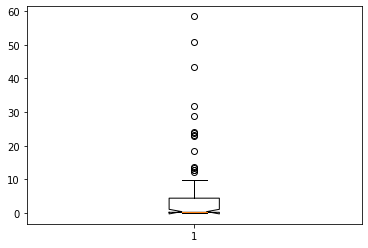

In [20]:
plt.boxplot(df4['gunhomirate'], notch=True)

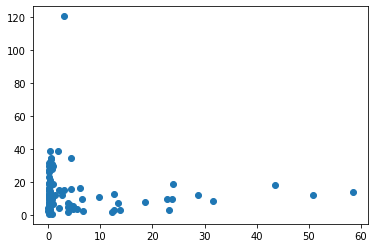

In [21]:
plt.scatter(df4['gunhomirate'] , df4['guncapita'])

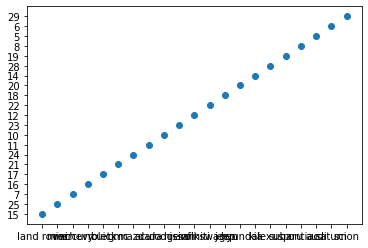

In [29]:
# cars most likely not to start with coresponding rank
plt.scatter(plot_df2['Brand'] , plot_df2['Most to Maintain Rank'])

In [30]:
# create dataframe for columns
plot_df3 = merged_data[['Brand', 'Cost']]

# remove rows with none and na and convert to string
plot_df3 = plot_df3.loc[plot_df3['Cost'] != 'None'].dropna().astype(str)

# remove values for conversion
plot_df3['Cost']= plot_df3['Cost'].str.replace(',', '').str.replace('$', '')

# recreate column as float
plot_df3['Cost'] = plot_df3['Cost'].astype(float)

# set dataframe with cost > 5k
plot_df3 = plot_df3.loc[plot_df3['Cost'] > 5000]

# remove duplicates
plot_df3.drop_duplicates(subset ="Cost", 
                     keep = False, inplace = True) 

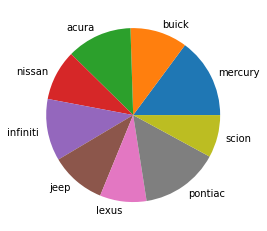

In [31]:
# Pie plot of cars companies with cost higher than 5k
plt.pie(plot_df3['Cost'], labels = plot_df3['Brand'] ) 

plt.show()

In [32]:
#create dataframe for columns
plot_df4 = merged_data[['Brand', 'Not Start Frequency']]

#drop na values and rows with None
plot_df4 = plot_df4.loc[plot_df4['Not Start Frequency'] != 'None'].dropna().astype(str)

# remove duplicates
plot_df4.drop_duplicates(subset ="Brand", 
                     keep = False, inplace = True) 

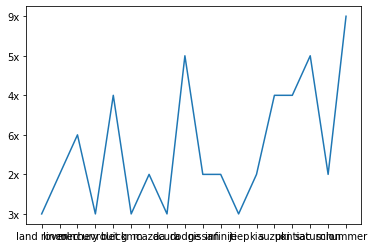

In [33]:
# Plot not start fequency by brand
plt.plot(plot_df4['Brand'] , plot_df4['Not Start Frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x12ce56f7cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x12ce57092e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x12ce56f7c50>],
 'medians': [<matplotlib.lines.Line2D at 0x12ce5709898>],
 'fliers': [<matplotlib.lines.Line2D at 0x12ce5709b70>],
 'means': []}

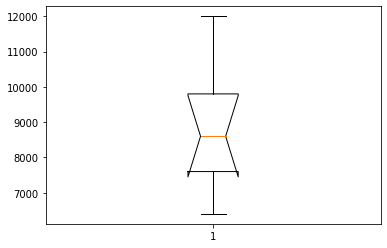

In [34]:
# Boxplot of cost range for meintaining cars > 5k
plt.boxplot(plot_df3['Cost'], notch=True)